<a href="https://colab.research.google.com/github/ojasrai17/DeepLearning/blob/main/lab7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def relu(x):
    return np.maximum(0, x)

In [ ]:
def convolution(input_featuremap, kernel, stride=1, padding=0, apply_relu=True):
    input_padded = np.pad(input_featuremap, ((padding, padding), (padding, padding)), mode='constant')
    H, W = input_padded.shape
    F, _ = kernel.shape
    out_H = (H - F) // stride + 1
    out_W = (W - F) // stride + 1
    output_featuremap = np.zeros((out_H, out_W))
    for i in range(out_H):
        for j in range(out_W):
            region = input_padded[i * stride: i * stride + F, j * stride: j * stride + F]
            output_featuremap[i, j] = np.sum(region * kernel)
    return relu(output_featuremap) if apply_relu else output_featuremap

In [ ]:
def convolution_multi_filter(input_featuremap, kernels, stride=1, padding=0):
    num_filters, F, _ = kernels.shape
    input_padded = np.pad(input_featuremap, ((padding, padding), (padding, padding), (0, 0)), mode='constant')
    H, W, C = input_padded.shape
    out_H = (H - F) // stride + 1
    out_W = (W - F) // stride + 1
    output_featuremap = np.zeros((out_H, out_W, num_filters))
    for k in range(num_filters):
        kernel = kernels[k]
        for i in range(out_H):
            for j in range(out_W):
                region = input_padded[i * stride: i * stride + F, j * stride: j * stride + F, :]
                output_featuremap[i, j, k] = np.sum(region * kernel[:,:,None])
    return relu(output_featuremap)

In [ ]:
def max_pooling(input_featuremap, pool_size, stride):
    if len(input_featuremap.shape) == 3:
        H, W, C = input_featuremap.shape
        out_H = (H - pool_size) // stride + 1
        out_W = (W - pool_size) // stride + 1
        pooled_featuremap = np.zeros((out_H, out_W, C))
        for c in range(C):
            for i in range(out_H):
                for j in range(out_W):
                    region = input_featuremap[i*stride:i*stride+pool_size, j*stride:j*stride+pool_size, c]
                    pooled_featuremap[i, j, c] = np.max(region)
    else:
        H, W = input_featuremap.shape
        out_H = (H - pool_size) // stride + 1
        out_W = (W - pool_size) // stride + 1
        pooled_featuremap = np.zeros((out_H, out_W))
        for i in range(out_H):
            for j in range(out_W):
                region = input_featuremap[i*stride:i*stride+pool_size, j*stride:j*stride+pool_size]
                pooled_featuremap[i, j] = np.max(region)
    return pooled_featuremap

In [ ]:
def alexnet_forward(input_image):

    conv1 = convolution_multi_filter(input_image, np.random.randn(96, 11, 11), stride=4, padding=2)
    pool1 = max_pooling(conv1, pool_size=3, stride=2)  # Shape: 27×27×96


    conv2 = convolution_multi_filter(pool1, np.random.randn(256, 5, 5), stride=1, padding=2)
    pool2 = max_pooling(conv2, pool_size=3, stride=2)  # Shape: 13×13×256


    conv3 = convolution_multi_filter(pool2, np.random.randn(384, 3, 3), stride=1, padding=1)
    conv4 = convolution_multi_filter(conv3, np.random.randn(384, 3, 3), stride=1, padding=1)
    conv5 = convolution_multi_filter(conv4, np.random.randn(256, 3, 3), stride=1, padding=1)


    conv5_2d = np.mean(conv5, axis=2)  # Shape: 13×13


    pool5 = max_pooling(conv5_2d, pool_size=3, stride=2)  # Shape: 6×6
    return pool5

[[[121.1379825   94.08720266  87.78488347]
  [  3.16081973 210.34973256  24.71516051]
  [245.78051457  43.45651553  94.71408829]
  ...
  [221.14084438 121.86659948 207.37877226]
  [ 45.34577511 154.20819875 195.08040547]
  [ 51.68934151 123.43630905  55.81108126]]

 [[120.78847308 239.59458156 142.15470497]
  [ 48.32100565  40.44424459 171.16710427]
  [158.30990427  88.05626337 227.83290071]
  ...
  [196.77719397  30.45550363 155.62877043]
  [221.70858571  65.27206555 147.28790023]
  [ 97.84297709  10.32661449  95.95436846]]

 [[ 29.85487386 120.9626865  197.84647843]
  [216.35974635 101.29930813  84.79748383]
  [252.40851562  49.03547028  64.77893074]
  ...
  [ 37.18097838 116.66487922 239.94679956]
  [ 63.67335713 239.47008588   4.50332192]
  [111.47443433  85.71066582 236.01247585]]

 ...

 [[160.96165108  49.23136922 115.61450334]
  [253.42871691 252.76176024 221.46268518]
  [  6.53533753 113.10162229  88.05520754]
  ...
  [175.22161767 126.23845643 157.91771174]
  [ 85.19524261  1

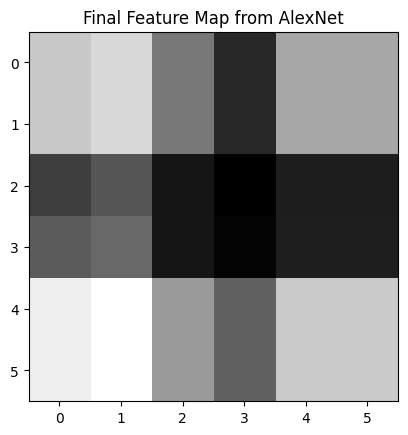

In [ ]:

image = np.random.rand(227, 227, 3)*255
print(image)
alexnet_output = alexnet_forward(image)

if len(alexnet_output.shape) == 3:
    plt.imshow(alexnet_output[:, :, 0], cmap="gray")
else:
    plt.imshow(alexnet_output, cmap="gray")
print(alexnet_output.shape)
plt.title("Final Feature Map from AlexNet")
plt.show()